In [1]:
import psycopg2
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import statsmodels.api as sm
from statsmodels.formula.api import ols
from distfit import distfit
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.tsa import forecasting
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.stattools import acf
from scipy.stats import bootstrap
from sklearn.model_selection import train_test_split
plt.style.use('tableau-colorblind10')

In [2]:
# Load the first dataset
# Create also the trimmed version of that

df1 = pd.read_csv("/data/aimotion/OULAD/OULAD_processed.csv")
df1['finalgrade'] = df1['norm_finalgrade']*100
df1 = df1.drop('Unnamed: 0', axis=1)
df_trimmed1 = df1[df1['finalgrade'].between(0.001, 99.999)]

In [3]:
print(df1.head())
print(len(df1))
print(df1.columns)

   userid  itemid  norm_finalgrade  time_diff  timemodified  courseid  \
0   11391    1752             0.78       19.0            18         0   
1   28400    1752             0.70       19.0            22         0   
2   31604    1752             0.72       19.0            17         0   
3   32885    1752             0.69       19.0            26         0   
4   38053    1752             0.79       19.0            19         0   

   finalgrade  
0        78.0  
1        70.0  
2        72.0  
3        69.0  
4        79.0  
173739
Index(['userid', 'itemid', 'norm_finalgrade', 'time_diff', 'timemodified',
       'courseid', 'finalgrade'],
      dtype='object')


[distfit] >fit..
[distfit] >transform..
[distfit] >[norm     ] [0.00 sec] [RSS: 0.00365495] [loc=75.800 scale=18.798]
[distfit] >[beta     ] [2.22 sec] [RSS: 0.00306776] [loc=-318.198 scale=418.198]
[distfit] >[lognorm  ] [2.78 sec] [RSS: 0.0036504] [loc=-5072.376 scale=5148.241]
[distfit] >[gamma    ] [0.98 sec] [RSS: 0.0039558] [loc=-82.573 scale=2.862]
[distfit] >[loggamma ] [0.26 sec] [RSS: 0.00317986] [loc=92.351 scale=9.695]
[distfit] >[cauchy   ] [0.10 sec] [RSS: 0.00393359] [loc=79.836 scale=10.305]
[distfit] >[chi      ] [1.02 sec] [RSS: 0.00411571] [loc=-1.257 scale=31.108]
[distfit] >[uniform  ] [0.00 sec] [RSS: 0.006854] [loc=0.000 scale=100.000]
[distfit] >[chi2     ] [1.28 sec] [RSS: 0.0259568] [loc=-0.000 scale=6.934]
[distfit] >[dgamma   ] [0.28 sec] [RSS: 0.00348904] [loc=78.475 scale=11.353]
[distfit] >[expon    ] [0.00 sec] [RSS: 0.00992526] [loc=0.000 scale=75.800]
[distfit] >[exponnorm] [0.64 sec] [RSS: 0.00365494] [loc=75.787 scale=18.798]
[distfit] >[t        ] [

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot: title={'center': '\nbeta\nRSS(a=17.2982, b=0.889271, loc=-318.198, scale=418.198)'}, xlabel='Values', ylabel='Frequency'>)

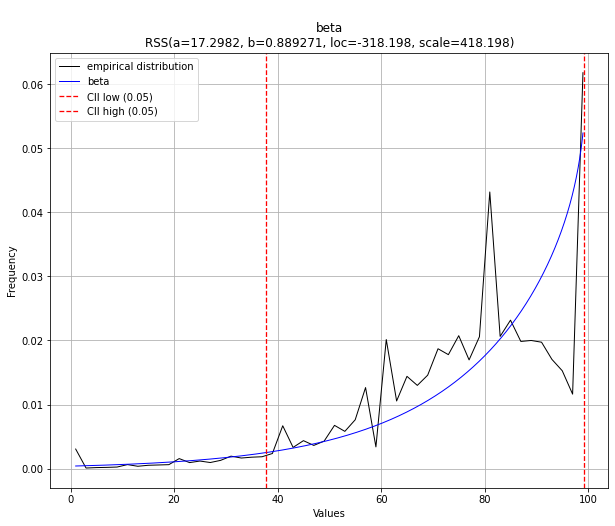

In [4]:
# Full dataset grade distribution

distr = ['norm', 'beta', 'lognorm', 'gamma', 'loggamma', 'cauchy', 'chi', 'uniform', 'chi2', 'dgamma', 
        'expon', 'exponnorm', 't', 'pareto', 'logistic']
dist = distfit(distr=distr)
# Fit on data
results=dist.fit_transform(df1['finalgrade'])
dist.plot()


[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm     ] [0.00 sec] [RSS: 0.000981295] [loc=130.633 scale=78.034]
[distfit] >[beta     ] [2.51 sec] [RSS: 0.000794653] [loc=12.000 scale=249.030]
[distfit] >[lognorm  ] [2.64 sec] [RSS: 0.000979691] [loc=-348.178 scale=472.265]
[distfit] >[gamma    ] [0.92 sec] [RSS: 0.000980901] [loc=-5305.308 scale=1.120]
[distfit] >[loggamma ] [0.90 sec] [RSS: 0.00098085] [loc=-14386.724 scale=2181.064]
[distfit] >[cauchy   ] [0.12 sec] [RSS: 0.00106718] [loc=126.729 scale=61.545]
[distfit] >[chi      ] [1.10 sec] [RSS: 0.00160648] [loc=12.000 scale=4.326]
[distfit] >[uniform  ] [0.00 sec] [RSS: 0.000806708] [loc=12.000 scale=249.000]
[distfit] >[chi2     ] [1.16 sec] [RSS: 0.00424182] [loc=12.000 scale=6.140]
[distfit] >[dgamma   ] [0.28 sec] [RSS: 0.000958282] [loc=105.633 scale=33.862]
[distfit] >[expon    ] [0.00 sec] [RSS: 0.000923197] [loc=12.000 scale=118.633]
[distfit] >[exponnorm] [0.71

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot: title={'center': '\nbeta\nRSS(a=0.92062, b=0.972657, loc=12, scale=249.03)'}, xlabel='Values', ylabel='Frequency'>)

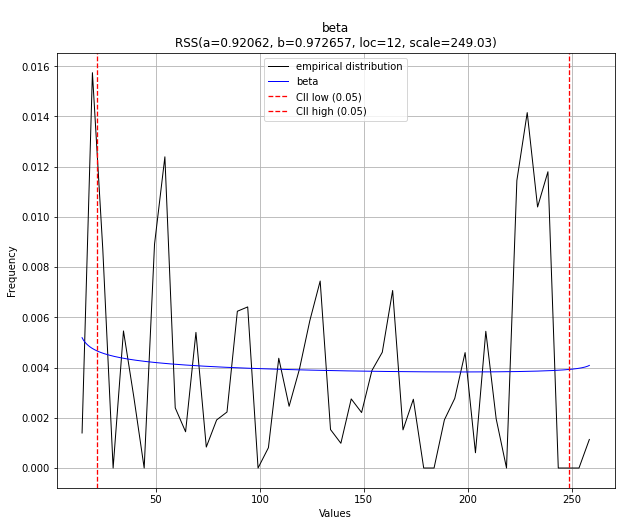

In [5]:
# Full dataset time distribution

time = df1['time_diff'].dropna()
results = dist.fit_transform(time)
dist.plot()

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm     ] [0.00 sec] [RSS: 0.00157303] [loc=73.016 scale=17.489]


[distfit] >[beta     ] [2.02 sec] [RSS: 0.000808014] [loc=-183.486 scale=283.464]
[distfit] >[lognorm  ] [2.37 sec] [RSS: 0.00157441] [loc=-6104.155 scale=6177.183]
[distfit] >[gamma    ] [0.88 sec] [RSS: 0.00189912] [loc=-162.818 scale=1.459]
[distfit] >[loggamma ] [0.26 sec] [RSS: 0.000785849] [loc=89.017 scale=8.199]
[distfit] >[cauchy   ] [0.08 sec] [RSS: 0.00149351] [loc=77.898 scale=9.251]
[distfit] >[chi      ] [0.90 sec] [RSS: 0.00162583] [loc=-373.788 scale=25.524]
[distfit] >[uniform  ] [0.00 sec] [RSS: 0.00536571] [loc=1.000 scale=98.000]
[distfit] >[chi2     ] [0.94 sec] [RSS: 0.00190357] [loc=-123.961 scale=0.904]
[distfit] >[dgamma   ] [0.26 sec] [RSS: 0.00114229] [loc=75.535 scale=9.802]
[distfit] >[expon    ] [0.00 sec] [RSS: 0.00849834] [loc=1.000 scale=72.016]
[distfit] >[exponnorm] [0.59 sec] [RSS: 0.00157303] [loc=73.004 scale=17.489]
[distfit] >[t        ] [5.32 sec] [RSS: 0.0013043] [loc=74.798 scale=14.570]
[distfit] >[pareto   ] [0.07 sec] [RSS: 0.00849834] [loc

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot: title={'center': '\nloggamma\nRSS(c=0.502433, loc=89.017, scale=8.19915)'}, xlabel='Values', ylabel='Frequency'>)

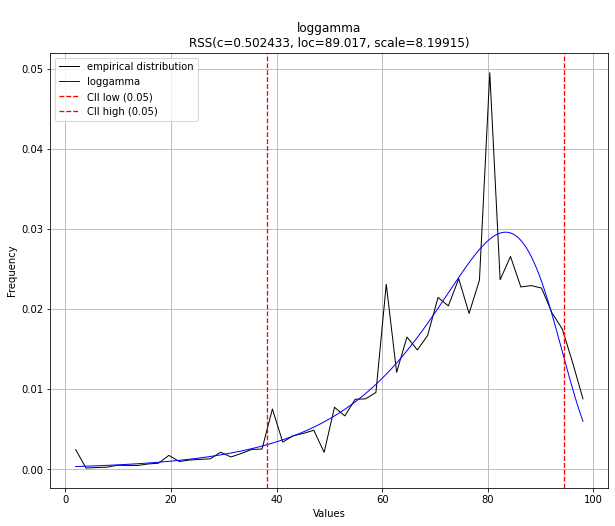

In [6]:
# Trimmed dataset grade distribution

distr = ['norm', 'beta', 'lognorm', 'gamma', 'loggamma', 'cauchy', 'chi', 'uniform', 'chi2', 'dgamma', 
        'expon', 'exponnorm', 't', 'pareto', 'logistic']
dist = distfit(distr=distr)
# Fit on data
results=dist.fit_transform(df_trimmed1['finalgrade'])
dist.plot()


[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm     ] [0.00 sec] [RSS: 0.000922281] [loc=129.523 scale=78.037]
[distfit] >[beta     ] [1.51 sec] [RSS: 0.000823475] [loc=-12.582 scale=273.582]
[distfit] >[lognorm  ] [2.36 sec] [RSS: 0.000912113] [loc=-128.482 scale=247.868]
[distfit] >[gamma    ] [0.83 sec] [RSS: 0.00092118] [loc=-2473.835 scale=2.339]
[distfit] >[loggamma ] [0.82 sec] [RSS: 0.000920647] [loc=-15219.630 scale=2278.288]
[distfit] >[cauchy   ] [0.10 sec] [RSS: 0.00100618] [loc=124.649 scale=61.030]
[distfit] >[chi      ] [1.00 sec] [RSS: 0.00153573] [loc=12.000 scale=6.872]
[distfit] >[uniform  ] [0.00 sec] [RSS: 0.000750675] [loc=12.000 scale=249.000]
[distfit] >[chi2     ] [1.03 sec] [RSS: 0.00367206] [loc=12.000 scale=6.262]
[distfit] >[dgamma   ] [0.31 sec] [RSS: 0.000899559] [loc=105.338 scale=34.085]
[distfit] >[expon    ] [0.00 sec] [RSS: 0.000856715] [loc=12.000 scale=117.523]
[distfit] >[exponnorm] [0.5

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot: title={'center': '\nuniform\nRSS(loc=12, scale=249)'}, xlabel='Values', ylabel='Frequency'>)

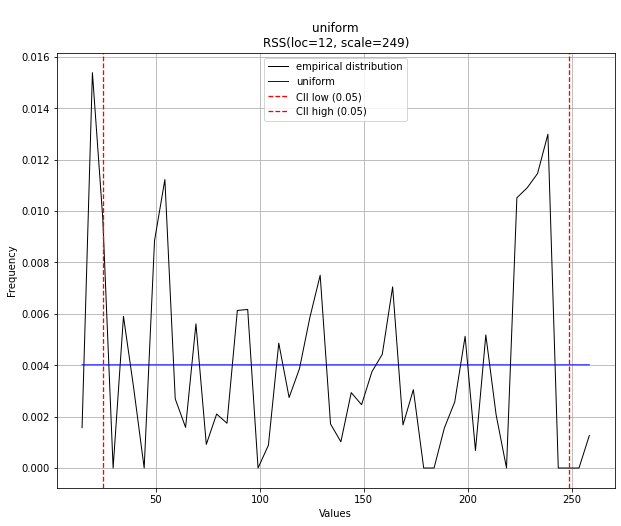

In [7]:
# Trimmed dataset time distribution

time = df_trimmed1['time_diff'].dropna()
results = dist.fit_transform(time)
dist.plot()

In [8]:
def UserReindex(df, userid = 'userid'):
    if isinstance(df, pd.DataFrame):
        df_n = df.sort_values('userid', inplace=True)
        df_n = df.reset_index()
        user = df_n['userid'].to_list()
        from itertools import accumulate
        indexes  = range(len(user))
        byGroup  = accumulate(indexes,lambda i,u: (i+1)*(u>0 and user[u-1]==user[u]))
        indexes  = [i-1 for i in accumulate(int(g==0) for g in byGroup)]
        indexAndUser = [(i,u) for i,u in zip(indexes,user)]
        new_user = pd.DataFrame([(i,u) for i,u in zip(indexes,user)], columns=['new_user', 'old_user'])

        df_n['userid_n'] = new_user['new_user']
        df_n = df_n.drop('index', axis=1)
        return df_n
    else:
        raise TypeError('The imported object is not a pandas.DataFrame. Please import a pandas.DataFrame type.')

In [9]:
# Dataset: /data/aimotion/OULAD/OULAD_processed.csv
# Trimmed Dataset
# Student Simulator 1

def StudentSimulator(df, size, add_method="reuse", userid = 'userid', seed=123):
    import random
    #Create the df
    data = pd.DataFrame(columns=['userid', 'itemid', 'norm_finalgrade', 'time_diff', 'timemodified', 'courseid', 'finalgrade'])
    
    np.random.seed(seed)
    vector = np.vectorize(np.int_)
    
    #Adding userid
    if add_method == 'reuse':
        #Creating the output dataframe
        newdf = pd.DataFrame()

        #Gather the unique users
        users = df[userid].unique()

        #Simulate students and reindexing
        ids = np.array(range(1, size+1))
        newuserid = []
        counter = 0

        while len(newdf) <= size:
            counter += 1
            user = int(np.random.choice(users, 1))
            t = df[userid]==user
            newdf = newdf.append(df[t]) 
            newuserid.append([counter]*t.sum())

        newuserid = [item for sublist in newuserid for item in sublist]
        newdf[userid] = newuserid

        newdf = newdf.reset_index()

        #Random remove the excess amount of observations 
        if len(newdf) > size:
            remove_n = len(newdf) - size
            drop_indices = np.random.choice(newdf.index, remove_n, replace=False)
            newdf1 = newdf.drop(drop_indices)
            
        users = newdf1['userid'].to_list()
        courses = newdf1['courseid'].to_list()
        items = newdf1['itemid'].to_list()
        data['userid'] = users
        data['courseid'] = courses
        data['itemid'] = items
       
    elif add_method == "simulate":
        #Adding userid accoring to statistics (mean=7, std=10)
        df = UserReindex(df = df, userid = userid)
        vector = np.vectorize(np.int_)
        uniques = int(size*df['userid_n'].nunique()/len(df))
        sampler = vector(np.linspace(start=1, stop=uniques, num=uniques))

        users = df['userid_n'].value_counts().rename_axis('userid').reset_index(name='counts')
        users_count = users['counts'].value_counts().rename_axis('no_of_grades').reset_index(name='no_of_students') 
        users_count = users_count.sort_values('no_of_grades')

        prob = stats.pareto.rvs(size=uniques, b=1.86, loc=-6.788, scale=7.788, random_state=seed)
        prob /= np.sum(prob)

        sampled_users = pd.Series(np.random.choice(sampler, size, p=prob))    
        data['userid'] = sampled_users


        #Adding courseid
        uniques = int(size*df['course'].nunique()/len(df))
        sampler = vector(np.linspace(start=1, stop=uniques, num=uniques))

        courses = df['courseid'].value_counts().rename_axis('courseid').reset_index(name='counts')
        courses_count = courses['counts'].value_counts().rename_axis('no_of_grades').reset_index(name='no_of_courses') 
        courses_count = courses_count.sort_values('no_of_grades')

        prob = stats.expon.rvs(size=uniques, loc=1, scale=58.928, random_state=seed)
        prob /= np.sum(prob)

        sampled_courses = pd.Series(np.random.choice(sampler, size, p=prob))    
        data['courseid'] = sampled_courses    

        #Adding items

        items = list(range(1, size+1))
        sampled_items = []
        data = data.sort_values('courseid')
        for i in tqdm(data['courseid'].unique(), desc='Finding quizzes'):
            myitems = [items.pop(random.randrange(len(items))) for _ in range(int(max(1, 0.15*len(data[data['courseid']==i]))))]
            sampled_items.append([random.choice(myitems) for _ in range(len(data[data['courseid']==i]))])


        data['itemid'] = sum(sampled_items, [])  

    

    #Adding grades
    grade=stats.loggamma.rvs(c=0.502433, loc=89.017, scale=8.19915, size=size)
    data['finalgrade'] = grade
    data['finalgrade'].where(data['finalgrade'] >= 0, 0, inplace=True)
    data['finalgrade'].where(data['finalgrade'] < 100, 100, inplace=True)

    data['norm_finalgrade'] = data['finalgrade']/100

    #Adding time
    time=stats.uniform.rvs(loc=12, scale=249, size=size)
    data['time_diff'] = time

    return(data)

In [10]:
# Simulated data for 1st dataset trimmed
simdata1 = StudentSimulator(df_trimmed1, len(df_trimmed1))
simdata1.head()

,userid,itemid,norm_finalgrade,time_diff,timemodified,courseid,finalgrade
0,1,34899,0.848051,219.011576,NaN,5,84.805076
1,1,34900,0.651906,230.915382,NaN,5,65.190612
2,1,34901,0.629342,211.781812,NaN,5,62.934235
3,1,34902,0.546524,205.202368,NaN,5,54.652411
4,1,34903,0.788764,215.894496,NaN,5,78.876409


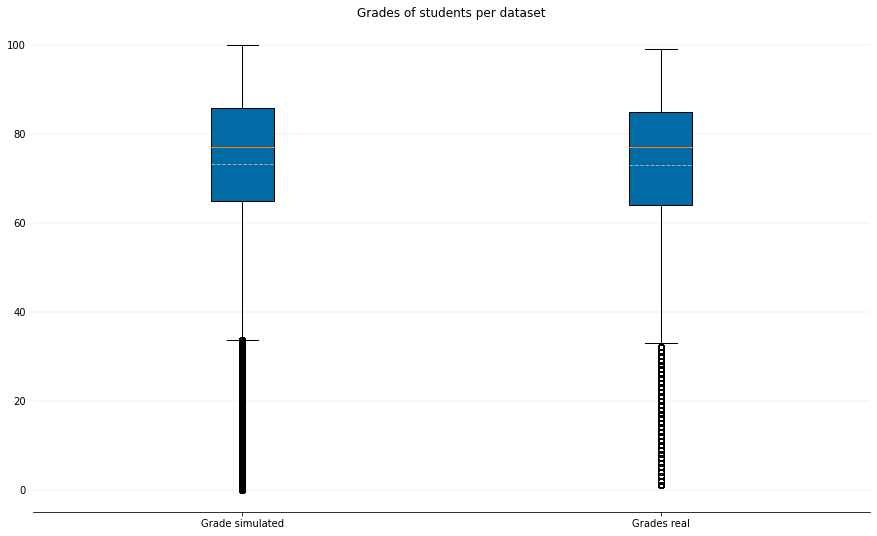

In [11]:
# Statistical analysis of real trimmed 1st dataset

fig, ax = plt.subplots(figsize=(15, 9))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Grades of students per dataset')

# Set species names as labels for the boxplot
dataset = {'Grade simulated': simdata1['finalgrade'], 'Grades real':df_trimmed1['finalgrade']}
bp0 = ax.boxplot(dataset.values(), patch_artist=True, showmeans=True, meanline=True, showcaps=True, )
#plt.axhline(y=simdata_full['grade'].mean(), color='r')
#plt.axhline(y=simdata_half['grade'].mean(), color='gold')
#plt.axhline(y=df['grade'].mean(), color='gold')

#for box in bp0['boxes']:
#    # change outline color
#    box.set(color='#377eb8', linewidth=2)
#    # change fill color
#    box.set(facecolor = '#dede00' )
#    # change hatch
#    box.set(animated=True, edgecolor='#377eb8')
ax.set_xticklabels(dataset.keys())       
plt.show()

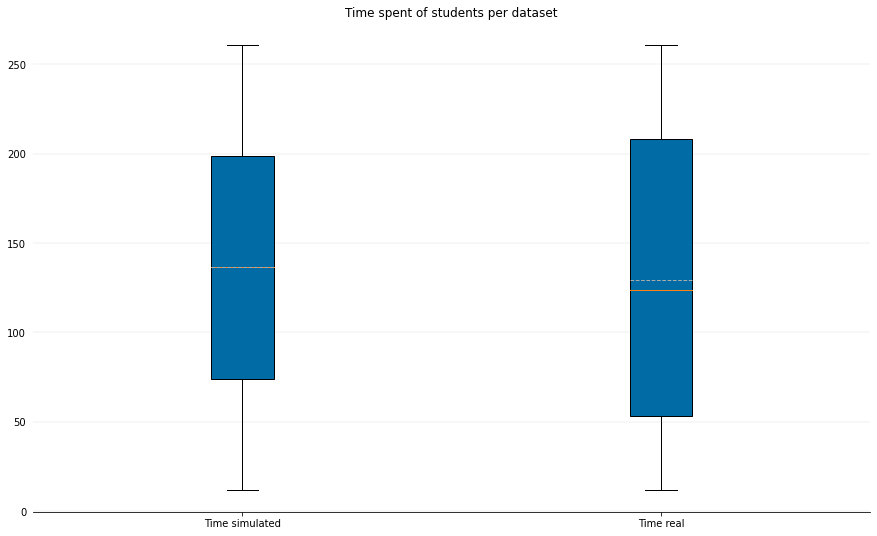

In [12]:
# Statistical analysis of real trimmed 1st dataset

fig, ax = plt.subplots(figsize=(15, 9))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Time spent of students per dataset')

# Set species names as labels for the boxplot
dataset = {'Time simulated': simdata1['time_diff'], 'Time real':df_trimmed1['time_diff'].dropna()}
bp0 = ax.boxplot(dataset.values(), patch_artist=True, showmeans=True, meanline=True, showcaps=True, )
#plt.axhline(y=simdata_full['grade'].mean(), color='r')
#plt.axhline(y=simdata_half['grade'].mean(), color='gold')
#plt.axhline(y=df['grade'].mean(), color='gold')

#for box in bp0['boxes']:
#    # change outline color
#    box.set(color='blue', linewidth=2)
#    # change fill color
#    box.set(facecolor = 'orange' )
#    # change hatch
#    box.set(animated=True, edgecolor='blue')
ax.set_xticklabels(dataset.keys())       
plt.show()

In [13]:
print(df_trimmed1['finalgrade'].describe(),
simdata1['finalgrade'].describe())

count    154597.000000
mean         73.015919
std          17.489335
min           1.000000
25%          64.000000
50%          77.000000
75%          85.000000
max          99.000000
Name: finalgrade, dtype: float64 count    154597.000000
mean         73.142731
std          17.671828
min           0.000000
25%          64.832672
50%          76.980598
75%          85.688871
max         100.000000
Name: finalgrade, dtype: float64


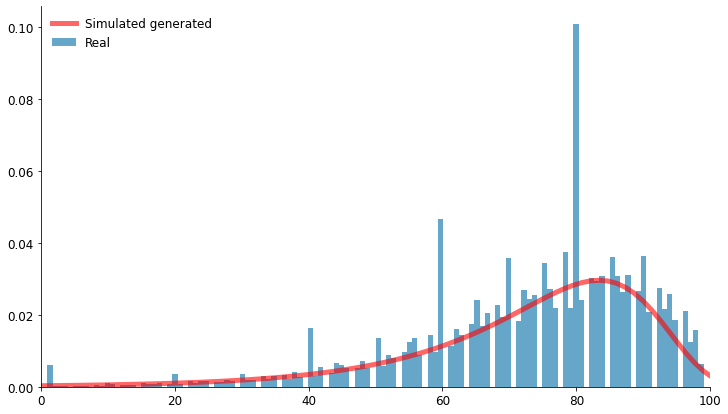

In [14]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(12, 7))

c=0.502433 
loc=89.017
scale=8.19915

x = np.linspace(stats.loggamma.ppf(0.001, c, loc, scale), stats.loggamma.ppf(0.999, c, loc, scale), 100)

ax.plot(x, stats.loggamma.pdf(x, c, loc, scale), 'r-', lw=5, alpha=0.6, label='Simulated generated')
rv = stats.loggamma(c, loc, scale)
#ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf 1')

ax.hist(df_trimmed1['finalgrade'], density=True, bins='auto', histtype='stepfilled', alpha=0.6, animated=True, label='Real')

ax.set_xlim([0, 100])
ax.legend(loc='upper left', frameon=False)
plt.show()

In [15]:
# Load the second dataset
# Create also the trimmed version of that

df2 = pd.read_csv("SLP_unit_processed_ogGrades.csv")
df2['finalgrade'] = (df2['full_score']-df2['score'])/df2['full_score']*100
df2 = df2.drop('Unnamed: 0', axis=1)
df_trimmed2 = df2[df2['finalgrade'].between(0.001, 99.999)]

In [16]:
print(df2.head())
print(len(df2))
print(df2.columns)

   userid  itemid  score  full_score     time_diff  timemodified  courseid  \
0       0       0      0         4.0  3.687701e+09  3.687701e+09         0   
1       0       1      2         7.0  3.687701e+09  3.687701e+09         0   
2       0       2      0         1.0  3.687701e+09  3.687701e+09         0   
3       0       3      0         1.0  3.687701e+09  3.687701e+09         0   
4       0       4      2         3.0  3.687701e+09  3.687701e+09         0   

   finalgrade  
0  100.000000  
1   71.428571  
2  100.000000  
3  100.000000  
4   33.333333  
460688
Index(['userid', 'itemid', 'score', 'full_score', 'time_diff', 'timemodified',
       'courseid', 'finalgrade'],
      dtype='object')


[distfit] >fit..
[distfit] >transform..
[distfit] >[norm     ] [0.00 sec] [RSS: 0.0949561] [loc=47.810 scale=47.302]
[distfit] >[beta     ] [4.80 sec] [RSS: 0.0804829] [loc=-1.095 scale=101.095]
[distfit] >[lognorm  ] [5.32 sec] [RSS: 0.0731718] [loc=-0.000 scale=2.945]
[distfit] >[gamma    ] [2.50 sec] [RSS: 0.094949] [loc=-790.522 scale=2.650]
[distfit] >[loggamma ] [3.45 sec] [RSS: 0.0922215] [loc=100.000 scale=0.000]
[distfit] >[cauchy   ] [0.32 sec] [RSS: 0.0952914] [loc=28.615 scale=40.866]
[distfit] >[chi      ] [2.83 sec] [RSS: 0.0688627] [loc=-0.000 scale=87.285]
[distfit] >[uniform  ] [0.00 sec] [RSS: 0.0926657] [loc=0.000 scale=100.000]
[distfit] >[chi2     ] [2.76 sec] [RSS: 0.058626] [loc=-0.000 scale=6.750]
[distfit] >[dgamma   ] [0.89 sec] [RSS: 0.0915136] [loc=43.617 scale=7.110]
[distfit] >[expon    ] [0.00 sec] [RSS: 0.0912981] [loc=0.000 scale=47.810]
[distfit] >[exponnorm] [2.28 sec] [RSS: 0.094956] [loc=45.786 scale=47.258]
[distfit] >[t        ] [13.0 sec] [RSS: 0

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot: title={'center': '\nchi2\nRSS(df=0.421997, loc=-2.25572e-25, scale=6.74993)'}, xlabel='Values', ylabel='Frequency'>)

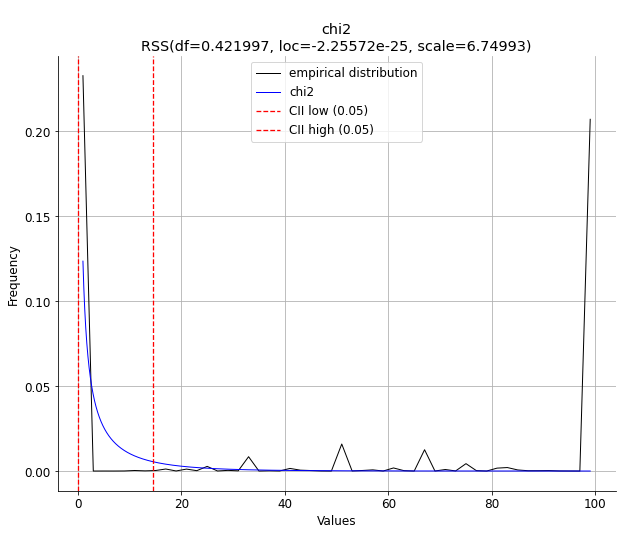

In [17]:
# Full dataset grade distribution

distr = ['norm', 'beta', 'lognorm', 'gamma', 'loggamma', 'cauchy', 'chi', 'uniform', 'chi2', 'dgamma', 
        'expon', 'exponnorm', 't', 'pareto', 'logistic']
dist = distfit(distr=distr)
# Fit on data
results=dist.fit_transform(df2['finalgrade'])
dist.plot()


[distfit] >fit..
[distfit] >transform..
[distfit] >[norm     ] [0.00 sec] [RSS: 0.0368653] [loc=53.156 scale=18.478]
[distfit] >[beta     ] [0.40 sec] [RSS: 0.0366105] [loc=2.993 scale=92.624]
[distfit] >[lognorm  ] [0.97 sec] [RSS: 0.0368769] [loc=-2120.098 scale=2173.225]
[distfit] >[gamma    ] [0.34 sec] [RSS: 0.0369129] [loc=-330.364 scale=0.901]
[distfit] >[loggamma ] [0.15 sec] [RSS: 0.0367599] [loc=-77.219 scale=57.561]
[distfit] >[cauchy   ] [0.03 sec] [RSS: 0.0374109] [loc=53.680 scale=12.425]
[distfit] >[chi      ] [0.42 sec] [RSS: 0.0369597] [loc=-58.290 scale=26.378]
[distfit] >[uniform  ] [0.00 sec] [RSS: 0.0385885] [loc=4.762 scale=90.476]
[distfit] >[chi2     ] [0.38 sec] [RSS: 0.0370336] [loc=-48.677 scale=1.791]
[distfit] >[expon    ] [0.00 sec] [RSS: 0.0412648] [loc=4.762 scale=48.394]
[distfit] >[exponnorm] [0.23 sec] [RSS: 0.0368653] [loc=53.140 scale=18.478]
[distfit] >[t        ] [1.91 sec] [RSS: 0.0368653] [loc=53.157 scale=18.478]
[distfit] >[pareto   ] [0.02 se

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot: title={'center': '\nbeta\nRSS(a=2.88685, b=2.4553, loc=2.99312, scale=92.6236)'}, xlabel='Values', ylabel='Frequency'>)

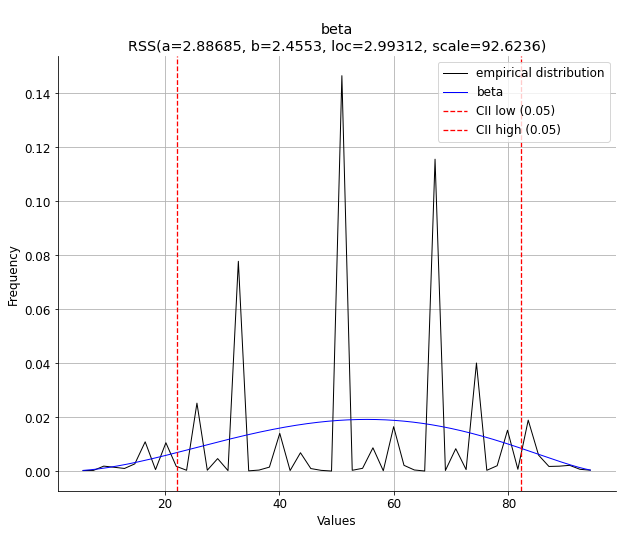

In [18]:
# Trimmed dataset grade distribution

distr = ['norm', 'beta', 'lognorm', 'gamma', 'loggamma', 'cauchy', 'chi', 'uniform', 'chi2', 
        'expon', 'exponnorm', 't', 'pareto', 'logistic']
dist = distfit(distr=distr)
# Fit on data
results=dist.fit_transform(df_trimmed2['finalgrade'])
dist.plot()


In [19]:
# Dataset: /data/aimotion/SLP/SLP_unit_processed.csv
# Trimmed Dataset
# Student Simulator 1

def StudentSimulator(df, size, add_method="reuse", userid = 'userid', seed=123):
    import random
    #Create the df
    data = pd.DataFrame(columns=['userid', 'itemid', 'norm_finalgrade', 'time_diff', 'timemodified', 'courseid', 'finalgrade'])
    
    np.random.seed(seed)
    vector = np.vectorize(np.int_)
    
    #Adding userid
    if add_method == 'reuse':
        #Creating the output dataframe
        newdf = pd.DataFrame()

        #Gather the unique users
        users = df[userid].unique()

        #Simulate students and reindexing
        ids = np.array(range(1, size+1))
        newuserid = []
        counter = 0

        while len(newdf) <= size:
            counter += 1
            user = int(np.random.choice(users, 1))
            t = df[userid]==user
            newdf = newdf.append(df[t]) 
            newuserid.append([counter]*t.sum())

        newuserid = [item for sublist in newuserid for item in sublist]
        newdf[userid] = newuserid

        newdf = newdf.reset_index()

        #Random remove the excess amount of observations 
        if len(newdf) > size:
            remove_n = len(newdf) - size
            drop_indices = np.random.choice(newdf.index, remove_n, replace=False)
            newdf1 = newdf.drop(drop_indices)
            
        users = newdf1['userid'].to_list()
        courses = newdf1['courseid'].to_list()
        items = newdf1['itemid'].to_list()
        time_diff = newdf1['time_diff'].to_list()
        time_modified = newdf1['timemodified'].to_list()
        data['userid'] = users
        data['courseid'] = courses
        data['itemid'] = items
        data['time_diff'] = time_diff
        data['timemodified'] = time_modified
       
    elif add_method == "simulate":
        #Adding userid accoring to statistics (mean=7, std=10)
        df = UserReindex(df = df, userid = userid)
        vector = np.vectorize(np.int_)
        uniques = int(size*df['userid_n'].nunique()/len(df))
        sampler = vector(np.linspace(start=1, stop=uniques, num=uniques))

        users = df['userid_n'].value_counts().rename_axis('userid').reset_index(name='counts')
        users_count = users['counts'].value_counts().rename_axis('no_of_grades').reset_index(name='no_of_students') 
        users_count = users_count.sort_values('no_of_grades')

        prob = stats.pareto.rvs(size=uniques, b=1.86, loc=-6.788, scale=7.788, random_state=seed)
        prob /= np.sum(prob)

        sampled_users = pd.Series(np.random.choice(sampler, size, p=prob))    
        data['userid'] = sampled_users


        #Adding courseid
        uniques = int(size*df['course'].nunique()/len(df))
        sampler = vector(np.linspace(start=1, stop=uniques, num=uniques))

        courses = df['courseid'].value_counts().rename_axis('courseid').reset_index(name='counts')
        courses_count = courses['counts'].value_counts().rename_axis('no_of_grades').reset_index(name='no_of_courses') 
        courses_count = courses_count.sort_values('no_of_grades')

        prob = stats.expon.rvs(size=uniques, loc=1, scale=58.928, random_state=seed)
        prob /= np.sum(prob)

        sampled_courses = pd.Series(np.random.choice(sampler, size, p=prob))    
        data['courseid'] = sampled_courses    

        #Adding items

        items = list(range(1, size+1))
        sampled_items = []
        data = data.sort_values('courseid')
        for i in tqdm(data['courseid'].unique(), desc='Finding quizzes'):
            myitems = [items.pop(random.randrange(len(items))) for _ in range(int(max(1, 0.15*len(data[data['courseid']==i]))))]
            sampled_items.append([random.choice(myitems) for _ in range(len(data[data['courseid']==i]))])


        data['itemid'] = sum(sampled_items, [])  

    

    #Adding grades
    grade=stats.loggamma.rvs(c=0.502433, loc=89.017, scale=8.19915, size=size)
    data['finalgrade'] = grade
    data['finalgrade'].where(data['finalgrade'] >= 0, 0, inplace=True)
    data['finalgrade'].where(data['finalgrade'] < 100, 100, inplace=True)

    data['norm_finalgrade'] = data['finalgrade']/100

    #Adding time
    #time=stats.uniform.rvs(loc=12, scale=249, size=size)
    #data['time_diff'] = time

    return(data)


In [20]:

# Simulated data for 1st dataset trimmed
simdata2 = StudentSimulator(df_trimmed2, len(df_trimmed2))
simdata2.head()


,userid,itemid,norm_finalgrade,time_diff,timemodified,courseid,finalgrade
0,1,248,0.734737,3.724524e+09,3.724524e+09,0,73.473653
1,1,249,0.766906,3.724524e+09,3.724524e+09,0,76.690601
2,1,1862,0.940927,3.689693e+09,3.689693e+09,2,94.092713
3,1,1879,0.717275,3.690733e+09,3.690733e+09,2,71.727514
4,1,1880,0.902329,3.690733e+09,3.690733e+09,2,90.232858


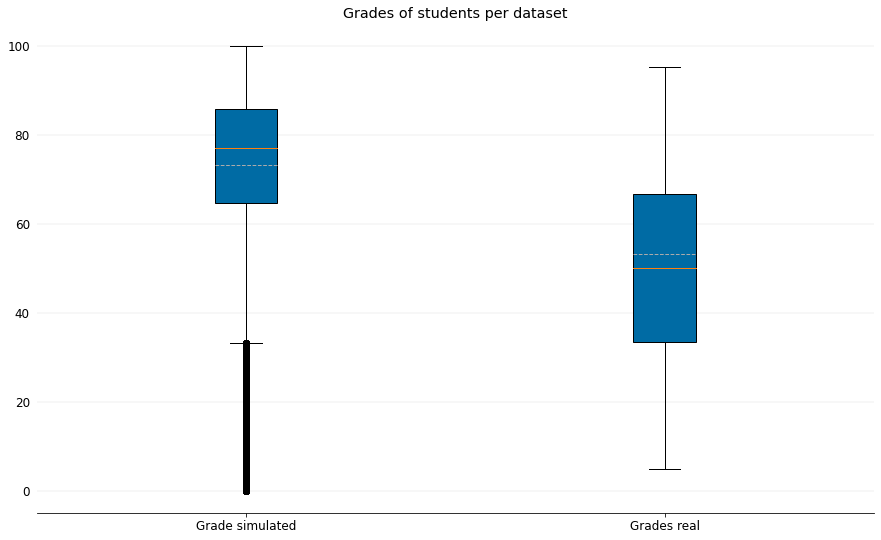

In [21]:

# Statistical analysis of real trimmed 1st dataset

fig, ax = plt.subplots(figsize=(15, 9))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Grades of students per dataset')

# Set species names as labels for the boxplot
dataset = {'Grade simulated': simdata2['finalgrade'], 'Grades real':df_trimmed2['finalgrade']}
bp0 = ax.boxplot(dataset.values(), patch_artist=True, showmeans=True, meanline=True, showcaps=True, )
#plt.axhline(y=simdata_full['grade'].mean(), color='r')
#plt.axhline(y=simdata_half['grade'].mean(), color='gold')
#plt.axhline(y=df['grade'].mean(), color='gold')

#for box in bp0['boxes']:
#    # change outline color
#    box.set(color='#377eb8', linewidth=2)
#    # change fill color
#    box.set(facecolor = '#dede00' )
#    # change hatch
#    box.set(animated=True, edgecolor='#377eb8')
ax.set_xticklabels(dataset.keys())       
plt.show()

In [22]:
print(df_trimmed2['finalgrade'].describe(),
simdata2['finalgrade'].describe())

count    55263.000000
mean        53.156353
std         18.478291
min          4.761905
25%         33.333333
50%         50.000000
75%         66.666667
max         95.238095
Name: finalgrade, dtype: float64 count    55263.000000
mean        73.174305
std         17.713194
min          0.000000
25%         64.749382
50%         77.025626
75%         85.809131
max        100.000000
Name: finalgrade, dtype: float64


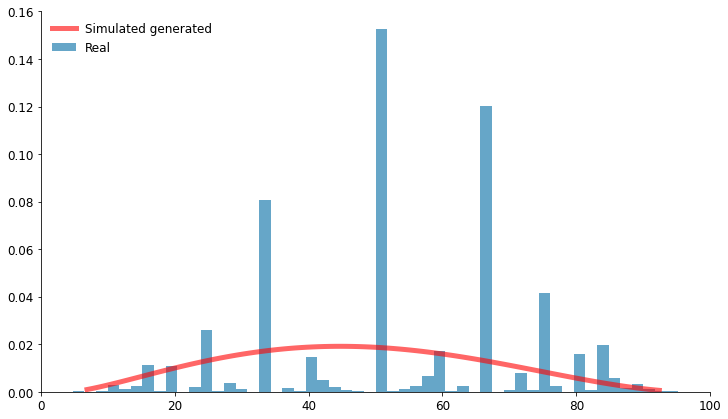

In [23]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(12, 7))

a=2.4553
b=2.88685
loc=4.38326
scale=92.6236

x = np.linspace(stats.beta.ppf(0.001, a, b, loc, scale), stats.beta.ppf(0.999, a, b, loc, scale), 100)

ax.plot(x, stats.beta.pdf(x, a, b, loc, scale), 'r-', lw=5, alpha=0.6, label='Simulated generated')
rv = stats.beta(a, b, loc, scale)
#ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf 1')

ax.hist(df_trimmed2['finalgrade'], density=True, bins='auto', histtype='stepfilled', alpha=0.6, animated=True, label='Real', )

ax.set_xlim([0, 100])
ax.legend(loc='upper left', frameon=False)
plt.show()

In [24]:
####Boxplots all in one

# '#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF'

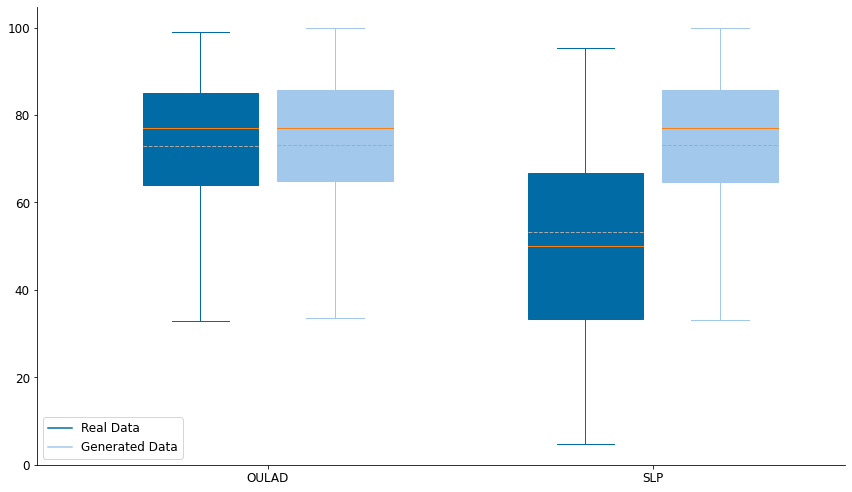

In [25]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 12})
plt.subplots(figsize=(12, 7))

ticks = ['OULAD', 'SLP']

data_a = [df_trimmed1['finalgrade'].to_list(), df_trimmed2['finalgrade'].to_list()]
data_b = [simdata1['finalgrade'].to_list(), simdata2['finalgrade'].to_list()]

def set_box_color(bp, color1, color2):
    plt.setp(bp['boxes'], color=color1)
    plt.setp(bp['whiskers'], color=color1)
    plt.setp(bp['caps'], color=color1)
    plt.setp(bp['medians'], color=color2)

#plt.figure(figsize=(12, 7))
#plt.subplots()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.35, sym='', widths=0.6, patch_artist=True, showmeans=True, meanline=True, showcaps=True)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.35, sym='', widths=0.6, patch_artist=True, showmeans=True, meanline=True, showcaps=True)
set_box_color(bpl, '#006BA4', '#FF800E') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#A2C8EC', '#FF800E')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#006BA4', label='Real Data')
plt.plot([], c='#A2C8EC', label='Generated Data')
plt.legend(loc = "lower left")

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1.2, len(ticks)*1.5)
#plt.ylim(0, 8)
plt.tight_layout()
plt.show()

In [26]:
#Student simulator 2 data

dfs1 = pd.read_csv('simdata1.csv')
dfs1_rand = pd.read_csv('simdata1_rand.csv')
dfs2 = pd.read_csv('simdata2.csv')
dfs2_rand = pd.read_csv('simdata2_rand.csv')

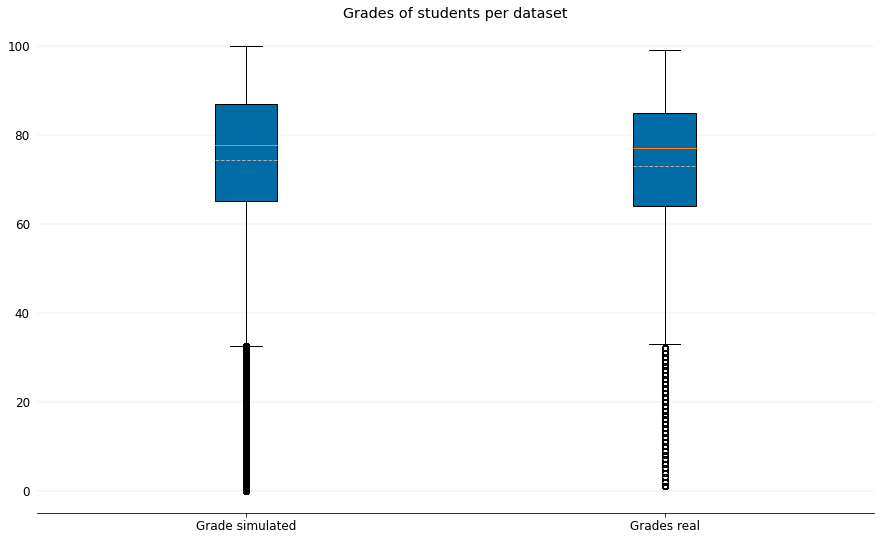

In [27]:
# Statistical analysis of real trimmed 1st dataset

fig, ax = plt.subplots(figsize=(15, 9))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Grades of students per dataset')

# Set species names as labels for the boxplot
dataset = {'Grade simulated': dfs1_rand['finalgrade'], 'Grades real':df_trimmed1['finalgrade']}
bp0 = ax.boxplot(dataset.values(), patch_artist=True, showmeans=True, meanline=True, showcaps=True, )
#plt.axhline(y=simdata_full['grade'].mean(), color='r')
#plt.axhline(y=simdata_half['grade'].mean(), color='gold')
#plt.axhline(y=df['grade'].mean(), color='gold')

#for box in bp0['boxes']:
#    # change outline color
#    box.set(color='#377eb8', linewidth=2)
#    # change fill color
#    box.set(facecolor = '#dede00' )
#    # change hatch
#    box.set(animated=True, edgecolor='#377eb8')
ax.set_xticklabels(dataset.keys())       
plt.show()

In [28]:
print(df_trimmed1['finalgrade'].describe(),
dfs1_rand['finalgrade'].describe())

count    154597.000000
mean         73.015919
std          17.489335
min           1.000000
25%          64.000000
50%          77.000000
75%          85.000000
max          99.000000
Name: finalgrade, dtype: float64 count    154597.000000
mean         74.430930
std          16.810297
min           0.000000
25%          65.182561
50%          77.740654
75%          86.904664
max         100.000000
Name: finalgrade, dtype: float64


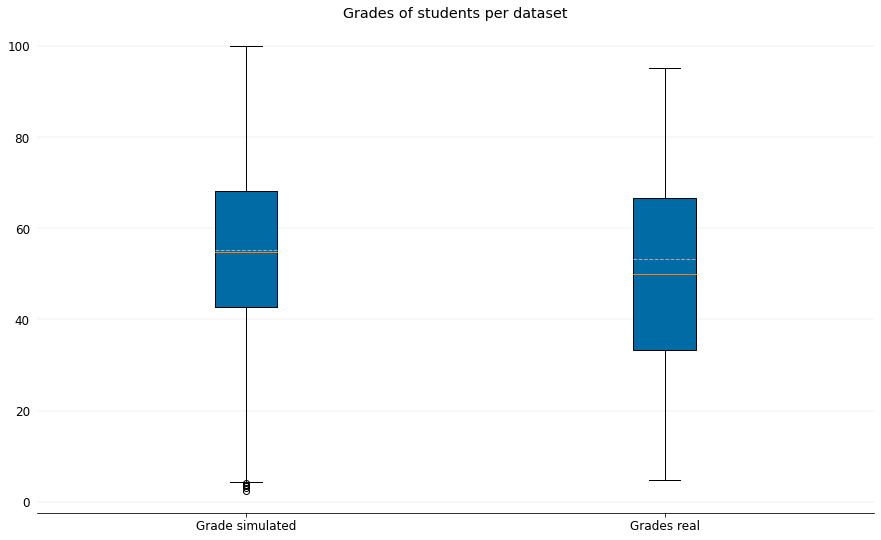

In [29]:
# Statistical analysis of real trimmed 1st dataset

fig, ax = plt.subplots(figsize=(15, 9))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Grades of students per dataset')

# Set species names as labels for the boxplot
dataset = {'Grade simulated': dfs2_rand['finalgrade'], 'Grades real':df_trimmed2['finalgrade']}
bp0 = ax.boxplot(dataset.values(), patch_artist=True, showmeans=True, meanline=True, showcaps=True, )
#plt.axhline(y=simdata_full['grade'].mean(), color='r')
#plt.axhline(y=simdata_half['grade'].mean(), color='gold')
#plt.axhline(y=df['grade'].mean(), color='gold')

#for box in bp0['boxes']:
#    # change outline color
#    box.set(color='#377eb8', linewidth=2)
#    # change fill color
#    box.set(facecolor = '#dede00' )
#    # change hatch
#    box.set(animated=True, edgecolor='#377eb8')
ax.set_xticklabels(dataset.keys())       
plt.show()

In [30]:
print(df_trimmed2['finalgrade'].describe(),
dfs2_rand['finalgrade'].describe())

count    55263.000000
mean        53.156353
std         18.478291
min          4.761905
25%         33.333333
50%         50.000000
75%         66.666667
max         95.238095
Name: finalgrade, dtype: float64 count    55263.000000
mean        55.112373
std         18.048216
min          2.451764
25%         42.606779
50%         54.790294
75%         68.191913
max        100.000000
Name: finalgrade, dtype: float64


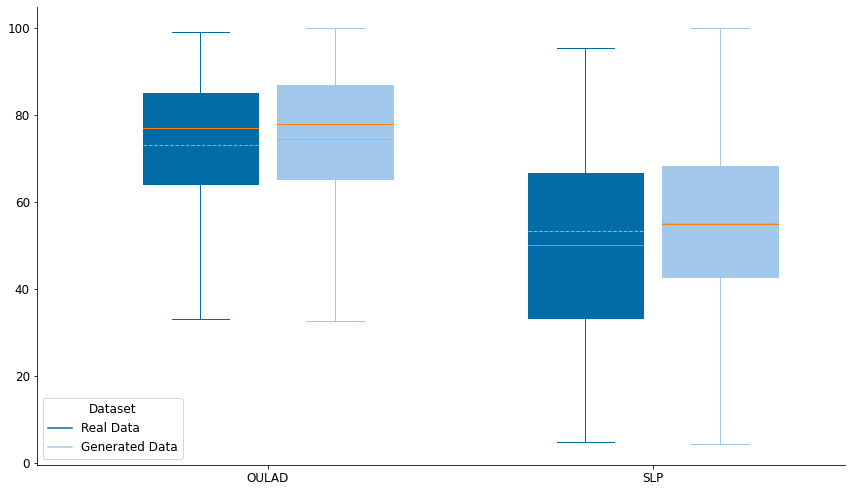

In [31]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 12})
plt.subplots(figsize=(12, 7))

ticks = ['OULAD', 'SLP']

data_a = [df_trimmed1['finalgrade'].to_list(), df_trimmed2['finalgrade'].to_list()]
data_b = [dfs1_rand['finalgrade'].to_list(), dfs2_rand['finalgrade'].to_list()]

def set_box_color(bp, color1, color2):
    plt.setp(bp['boxes'], color=color1)
    plt.setp(bp['whiskers'], color=color1)
    plt.setp(bp['caps'], color=color1)
    plt.setp(bp['medians'], color=color2)

#plt.figure(figsize=(12, 7))
#plt.subplots()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.35, sym='', widths=0.6, patch_artist=True, showmeans=True, meanline=True, showcaps=True)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.35, sym='', widths=0.6, patch_artist=True, showmeans=True, meanline=True, showcaps=True)
set_box_color(bpl, '#006BA4', '#FF800E') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#A2C8EC', '#FF800E')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#006BA4', label='Real Data')
plt.plot([], c='#A2C8EC', label='Generated Data')
plt.legend(loc = "lower left", title="Dataset")

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1.2, len(ticks)*1.5)
#plt.ylim(0, 8)
plt.tight_layout()
plt.show()

In [32]:
def StudentSimulator3(df, size, grades='grade', userid='userid', quizid='quizid', 
                      courseid='courseid', random_state=123):
    
    """
    StudentSimulator3 simulates data based on 
    real student data. Giving a educational dataset
    can reproduce it and return simulated student attempts.

    :df: The pandas dataframe to be reproduced 
    :size: Final amount of observations 
    :grades: Name of the column which contain grades in scale 0 to 100 (Default: grade)
    :userid: Name of the column which contain users (Default: userid)
    :quizid: Name of the column which contain quizzes (Default: quizid)
    :courseid: Name of the column which contain courses (Default: courseid)
    :random_state: The seed which fixes the randomness
    :return: Returns a pd dataframe with student grades simulated from real data
    with real properties.
    """
    
    if isinstance(df, pd.DataFrame):
        #Setting the seed
        if random_state != None:
            np.random.seed(random_state)

        #Creating the output dataframe
        newdf = pd.DataFrame()

        #Gather the unique users
        users = df['userid'].unique()

        #Simulate students and reindexing
        ids = np.array(range(1, size+1))
        newuserid = []
        counter = 0

        while len(newdf) <= size:
            counter += 1
            user = int(np.random.choice(users, 1))
            t = df[userid]==user
            newdf = newdf.append(df[t]) 
            newuserid.append([counter]*t.sum())

        newuserid = [item for sublist in newuserid for item in sublist]
        newdf[userid] = newuserid

        newdf = newdf.reset_index()

        #Random remove the excess amount of observations 
        if len(newdf) > size:
            remove_n = len(newdf) - size
            drop_indices = np.random.choice(newdf.index, remove_n, replace=False)
            newdf1 = newdf.drop(drop_indices)

        #Adding random noise to real data and fixing the final output
        newdf1[grades] = newdf1[grades] + np.random.normal(0, 3, size)

        newdf1[grades].where(newdf1[grades]<100, 100, inplace=True)
        newdf1[grades].where(newdf1[grades]>=0, 0, inplace=True)    

        newdf1[grades] = newdf1[grades].round(2)
        newdf1 = newdf1.reset_index().drop(['level_0', 'index'], axis=1)

        #Reindexing items and courses for anonymity 
        if quizid in df.columns:
            df_n = newdf1.sort_values(quizid, inplace=True)
            df_n = newdf1.reset_index()
            item = df_n[quizid].to_list()
            from itertools import accumulate
            indexes  = range(len(item))
            byGroup  = accumulate(indexes,lambda i,u: (i+1)*(u>0 and item[u-1]==item[u]))
            indexes  = [i-1 for i in accumulate(int(g==0) for g in byGroup)]
            indexAndItem = [(i,u) for i,u in zip(indexes,item)]
            new_item = pd.DataFrame([(i,u) for i,u in zip(indexes,item)], columns=['new_item', 'old_item'])

            df_n[quizid] = new_item['new_item']
            df_n = df_n.drop('index', axis=1)

        if courseid in df.columns:    
            df_n1 = df_n.sort_values(courseid, inplace=True)
            df_n1 = df_n.reset_index()
            course = df_n[courseid].to_list()
            from itertools import accumulate
            indexes  = range(len(course))
            byGroup  = accumulate(indexes,lambda i,u: (i+1)*(u>0 and course[u-1]==course[u]))
            indexes  = [i-1 for i in accumulate(int(g==0) for g in byGroup)]
            indexAndcourse = [(i,u) for i,u in zip(indexes,course)]
            new_course = pd.DataFrame([(i,u) for i,u in zip(indexes,course)], columns=['new_course', 'old_course'])

            df_n1[courseid] = new_course['new_course']
            df_n1 = df_n1.drop('index', axis=1)

        newdf = df_n1.sample(frac=1).reset_index(drop=True)
        newdf = newdf[[userid, courseid, quizid, grades]]
        return newdf
    
    else:
        raise TypeError('The imported object is not a pandas.DataFrame. Please import a pandas.DataFrame type.')            

In [33]:
dfs3_1 = StudentSimulator3(df_trimmed1, len(df_trimmed1),'finalgrade', 'userid', 'itemid')
dfs3_2 = StudentSimulator3(df_trimmed2, len(df_trimmed2),'finalgrade', 'userid', 'itemid')

In [34]:
dfs2.head()

,Unnamed: 0,userid,itemid,courseid,finalgrade
0,0,327,1880,2,69.105438
1,1,1336,73,0,65.125268
2,2,2028,21,0,53.137696
3,3,1840,4284,5,53.239255
4,4,1578,8,0,56.371531


In [35]:
df2.columns

Index(['userid', 'itemid', 'score', 'full_score', 'time_diff', 'timemodified',
       'courseid', 'finalgrade'],
      dtype='object')

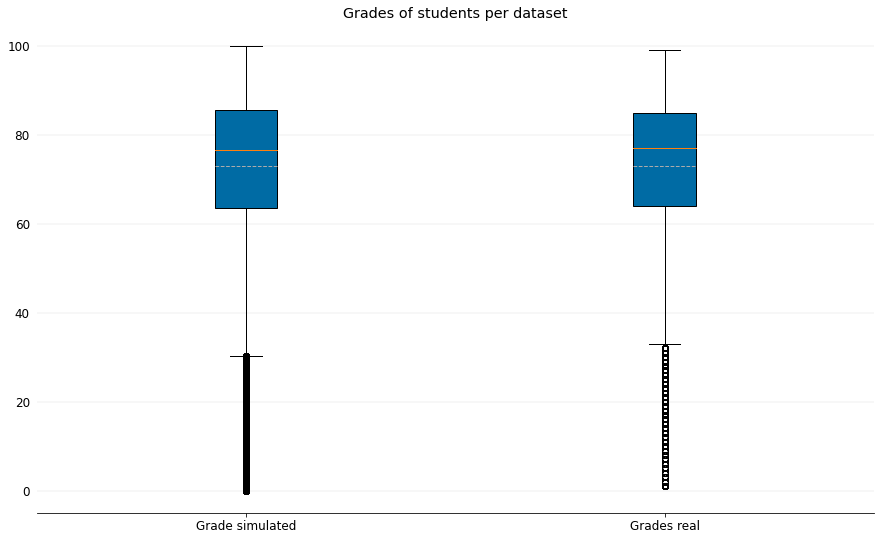

In [36]:
# Statistical analysis of real trimmed 1st dataset

fig, ax = plt.subplots(figsize=(15, 9))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Grades of students per dataset')

# Set species names as labels for the boxplot
dataset = {'Grade simulated': dfs3_1['finalgrade'], 'Grades real':df_trimmed1['finalgrade']}
bp0 = ax.boxplot(dataset.values(), patch_artist=True, showmeans=True, meanline=True, showcaps=True, )
#plt.axhline(y=simdata_full['grade'].mean(), color='r')
#plt.axhline(y=simdata_half['grade'].mean(), color='gold')
#plt.axhline(y=df['grade'].mean(), color='gold')

#for box in bp0['boxes']:
#    # change outline color
#    box.set(color='#377eb8', linewidth=2)
#    # change fill color
#    box.set(facecolor = '#dede00' )
#    # change hatch
#    box.set(animated=True, edgecolor='#377eb8')
ax.set_xticklabels(dataset.keys())       
plt.show()

In [37]:
print(df_trimmed1['finalgrade'].describe(),
dfs3_1['finalgrade'].describe())

count    154597.000000
mean         73.015919
std          17.489335
min           1.000000
25%          64.000000
50%          77.000000
75%          85.000000
max          99.000000
Name: finalgrade, dtype: float64 count    154597.000000
mean         73.028636
std          17.707850
min           0.000000
25%          63.530000
50%          76.630000
75%          85.670000
max         100.000000
Name: finalgrade, dtype: float64


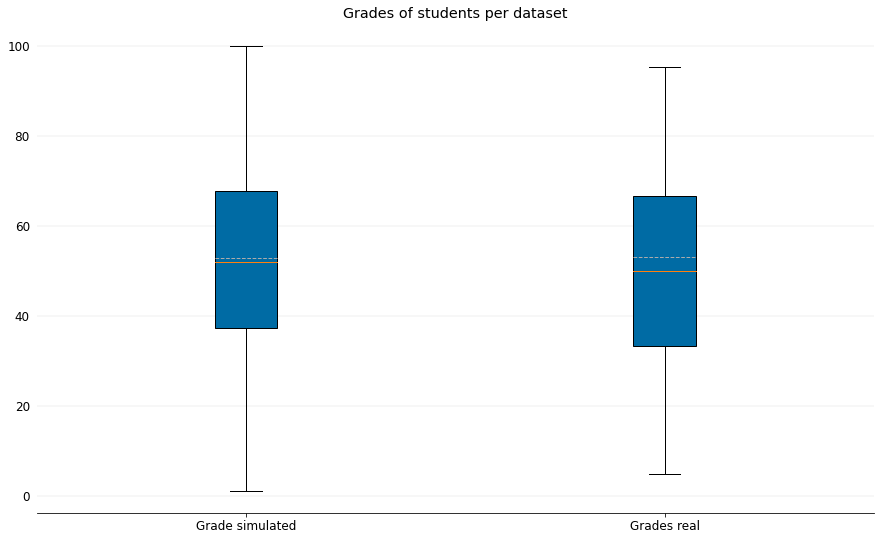

In [38]:
# Statistical analysis of real trimmed 1st dataset

fig, ax = plt.subplots(figsize=(15, 9))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Grades of students per dataset')

# Set species names as labels for the boxplot
dataset = {'Grade simulated': dfs3_2['finalgrade'], 'Grades real':df_trimmed2['finalgrade']}
bp0 = ax.boxplot(dataset.values(), patch_artist=True, showmeans=True, meanline=True, showcaps=True, )
#plt.axhline(y=simdata_full['grade'].mean(), color='r')
#plt.axhline(y=simdata_half['grade'].mean(), color='gold')
#plt.axhline(y=df['grade'].mean(), color='gold')

#for box in bp0['boxes']:
#    # change outline color
#    box.set(color='#377eb8', linewidth=2)
#    # change fill color
#    box.set(facecolor = '#dede00' )
#    # change hatch
#    box.set(animated=True, edgecolor='#377eb8')
ax.set_xticklabels(dataset.keys())       
plt.show()

In [39]:
print(df_trimmed2['finalgrade'].describe(),
dfs3_2['finalgrade'].describe())

count    55263.000000
mean        53.156353
std         18.478291
min          4.761905
25%         33.333333
50%         50.000000
75%         66.666667
max         95.238095
Name: finalgrade, dtype: float64 count    55263.000000
mean        52.921626
std         18.707946
min          1.150000
25%         37.350000
50%         51.960000
75%         67.660000
max        100.000000
Name: finalgrade, dtype: float64


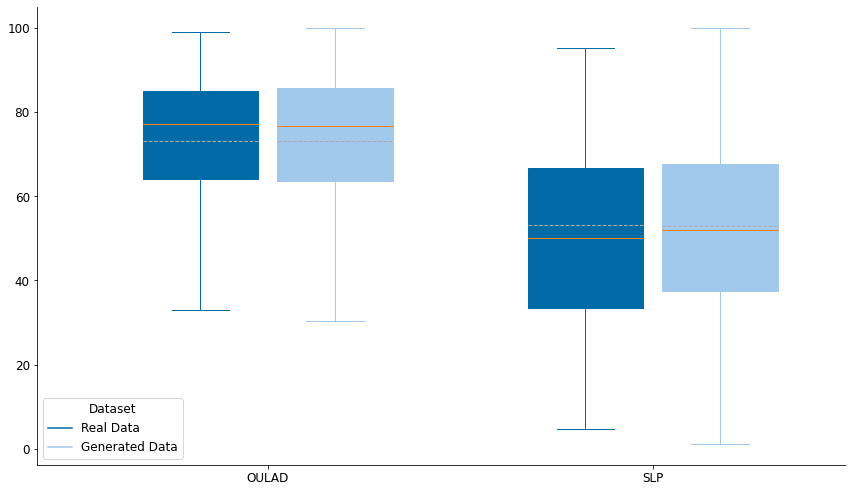

In [40]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 12})
plt.subplots(figsize=(12, 7))

ticks = ['OULAD', 'SLP']

data_a = [df_trimmed1['finalgrade'].to_list(), df_trimmed2['finalgrade'].to_list()]
data_b = [dfs3_1['finalgrade'].to_list(), dfs3_2['finalgrade'].to_list()]

def set_box_color(bp, color1, color2):
    plt.setp(bp['boxes'], color=color1)
    plt.setp(bp['whiskers'], color=color1)
    plt.setp(bp['caps'], color=color1)
    plt.setp(bp['medians'], color=color2)

#plt.figure(figsize=(12, 7))
#plt.subplots()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.35, sym='', widths=0.6, patch_artist=True, showmeans=True, meanline=True, showcaps=True)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.35, sym='', widths=0.6, patch_artist=True, showmeans=True, meanline=True, showcaps=True)
set_box_color(bpl, '#006BA4', '#FF800E') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#A2C8EC', '#FF800E')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#006BA4', label='Real Data')
plt.plot([], c='#A2C8EC', label='Generated Data')
plt.legend(loc = "lower left", title="Dataset")

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1.2, len(ticks)*1.5)
#plt.ylim(0, 8)
plt.tight_layout()
plt.show()

In [41]:
# Simulator 1
# Dataset 1
print(stats.ttest_ind(a=df_trimmed1['finalgrade'], b=simdata1['finalgrade'], equal_var=True))

# Dataset 2
print(stats.ttest_ind(a=df_trimmed2['finalgrade'], b=simdata2['finalgrade'], equal_var=True))

Ttest_indResult(statistic=-2.0054241220127547, pvalue=0.04491859482666987)
Ttest_indResult(statistic=-183.84356770567408, pvalue=0.0)


In [42]:
# Simulator 2
# Dataset 
print(stats.ttest_ind(df_trimmed1['finalgrade'], dfs1_rand['finalgrade']))

# Dataset 2
print(stats.ttest_ind(df_trimmed2['finalgrade'], dfs2_rand['finalgrade']))

Ttest_indResult(statistic=-22.935114982180764, pvalue=2.596306155928777e-116)
Ttest_indResult(statistic=-17.80193932992918, pvalue=8.57590828237711e-71)


In [43]:
# Simulator 3
# Dataset 1
print(stats.ttest_ind(df_trimmed1['finalgrade'], dfs3_1['finalgrade']))

# Dataset 2
print(stats.ttest_ind(df_trimmed2['finalgrade'], dfs3_2['finalgrade']))

Ttest_indResult(statistic=-0.20089978304754946, pvalue=0.840777069502533)
Ttest_indResult(statistic=2.0984785883700714, pvalue=0.03586515292066921)


In [44]:
import pingouin as pg
# Conducting two-sample ttest
result = pg.ttest(df_trimmed1['finalgrade'],
                  simdata1['finalgrade'],
                  correction=True)
 
# Print the result
print('T-Test Sim1 Data1', result[['p-val', 'cohen-d']])

result = pg.ttest(df_trimmed2['finalgrade'],
                  simdata2['finalgrade'],
                  correction=True)
 
# Print the result
print('T-Test Sim1 Data2', result[['p-val', 'cohen-d']])

T-Test Sim1 Data1            p-val   cohen-d
T-test  0.044919  0.007213
T-Test Sim1 Data2         p-val   cohen-d
T-test    0.0  1.105977


In [45]:

result = pg.ttest(df_trimmed1['finalgrade'],
                  dfs1_rand['finalgrade'],
                  correction=True)
 
# Print the result
print('T-Test Sim2 Data1', result[['p-val', 'cohen-d']])

result = pg.ttest(df_trimmed2['finalgrade'],
                  dfs2_rand['finalgrade'],
                  correction=True)
 
# Print the result
print('T-Test Sim2 Data1', result[['p-val', 'cohen-d']])

T-Test Sim2 Data1                 p-val   cohen-d
T-test  2.597218e-116  0.082493
T-Test Sim2 Data1                p-val   cohen-d
T-test  8.576991e-71  0.107094


In [46]:

result = pg.ttest(df_trimmed1['finalgrade'],
                  dfs3_1['finalgrade'],
                  correction=True)
 
# Print the result
print('T-Test Sim3 Data1', result[['p-val', 'cohen-d']])

result = pg.ttest(df_trimmed2['finalgrade'],
                  dfs3_2['finalgrade'],
                  correction=True)
 
# Print the result
print('T-Test Sim3 Data2', result[['p-val', 'cohen-d']])

T-Test Sim3 Data1            p-val   cohen-d
T-test  0.840777  0.000723
T-Test Sim3 Data2            p-val   cohen-d
T-test  0.035865  0.012624


In [47]:
%pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [48]:
import researchpy as rp

summary1_1, results1_1 = rp.ttest(group1= df_trimmed1['finalgrade'], group1_name= "Real", group2= simdata1['finalgrade'], group2_name= "Generated")
summary1_2, results1_2 = rp.ttest(group1= df_trimmed2['finalgrade'], group1_name= "Real", group2= simdata2['finalgrade'], group2_name= "Generated")
summary2_1, results2_1 = rp.ttest(group1= df_trimmed1['finalgrade'], group1_name= "Real", group2= dfs1_rand['finalgrade'], group2_name= "Generated")
summary2_2, results2_2 = rp.ttest(group1= df_trimmed2['finalgrade'], group1_name= "Real", group2= dfs2_rand['finalgrade'], group2_name= "Generated")
summary3_1, results3_1 = rp.ttest(group1= df_trimmed1['finalgrade'], group1_name= "Real", group2= dfs3_1['finalgrade'], group2_name= "Generated")
summary3_2, results3_2 = rp.ttest(group1= df_trimmed2['finalgrade'], group1_name= "Real", group2= dfs3_2['finalgrade'], group2_name= "Generated")

In [49]:
results1_1

,Independent t-test,results
0,Difference (Real - Generated) =,-0.1268
1,Degrees of freedom =,309192.0000
2,t =,-2.0054
3,Two side test p value =,0.0449
4,Difference < 0 p value =,0.0225
5,Difference > 0 p value =,0.9775
6,Cohen's d =,-0.0072
7,Hedge's g =,-0.0072
8,Glass's delta1 =,-0.0073
9,Point-Biserial r =,-0.0036


In [50]:
results1_2

,Independent t-test,results
0,Difference (Real - Generated) =,-20.0180
1,Degrees of freedom =,110524.0000
2,t =,-183.8436
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-1.1060
7,Hedge's g =,-1.1060
8,Glass's delta1 =,-1.0833
9,Point-Biserial r =,-0.4839


In [51]:
results2_1

,Independent t-test,results
0,Difference (Real - Generated) =,-1.4150
1,Degrees of freedom =,309192.0000
2,t =,-22.9351
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.0825
7,Hedge's g =,-0.0825
8,Glass's delta1 =,-0.0809
9,Point-Biserial r =,-0.0412


In [52]:
results2_2

,Independent t-test,results
0,Difference (Real - Generated) =,-1.9560
1,Degrees of freedom =,110524.0000
2,t =,-17.8019
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.1071
7,Hedge's g =,-0.1071
8,Glass's delta1 =,-0.1059
9,Point-Biserial r =,-0.0535


In [53]:
results3_1

,Independent t-test,results
0,Difference (Real - Generated) =,-0.0127
1,Degrees of freedom =,309192.0000
2,t =,-0.2009
3,Two side test p value =,0.8408
4,Difference < 0 p value =,0.4204
5,Difference > 0 p value =,0.5796
6,Cohen's d =,-0.0007
7,Hedge's g =,-0.0007
8,Glass's delta1 =,-0.0007
9,Point-Biserial r =,-0.0004


In [54]:
results3_2

,Independent t-test,results
0,Difference (Real - Generated) =,0.2347
1,Degrees of freedom =,110524.0000
2,t =,2.0985
3,Two side test p value =,0.0359
4,Difference < 0 p value =,0.9821
5,Difference > 0 p value =,0.0179
6,Cohen's d =,0.0126
7,Hedge's g =,0.0126
8,Glass's delta1 =,0.0127
9,Point-Biserial r =,0.0063
